In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 

In [2]:
matches=pd.read_csv('IPL.csv')

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches = matches[['season','team1','team2','city','toss_winner','winner']]

In [5]:
matches.head()

,season,team1,team2,city,toss_winner,winner
0,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
1,2017,Mumbai Indians,Rising Pune Supergiant,Pune,Rising Pune Supergiant,Rising Pune Supergiant
2,2017,Gujarat Lions,Kolkata Knight Riders,Rajkot,Kolkata Knight Riders,Kolkata Knight Riders
3,2017,Rising Pune Supergiant,Kings XI Punjab,Indore,Kings XI Punjab,Kings XI Punjab
4,2017,Royal Challengers Bangalore,Delhi Daredevils,Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore


In [6]:
matches.rename(columns={'city':'Homeground'}, inplace=True)

In [7]:
matches.head()

,season,team1,team2,Homeground,toss_winner,winner
0,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
1,2017,Mumbai Indians,Rising Pune Supergiant,Pune,Rising Pune Supergiant,Rising Pune Supergiant
2,2017,Gujarat Lions,Kolkata Knight Riders,Rajkot,Kolkata Knight Riders,Kolkata Knight Riders
3,2017,Rising Pune Supergiant,Kings XI Punjab,Indore,Kings XI Punjab,Kings XI Punjab
4,2017,Royal Challengers Bangalore,Delhi Daredevils,Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore


In [8]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors','Delhi Capitals']
                ,['Mumbai','Kolkata','Bangalore','Hyderabad','Chennai','Rajasthan','Delhi','Gujarat','Punjab','Hyderabad','Pune','Pune','Kochi','Pune','Delhi'],inplace=True)

In [9]:
matches.head()

,season,team1,team2,Homeground,toss_winner,winner
0,2017,Hyderabad,Bangalore,Hyderabad,Bangalore,Hyderabad
1,2017,Mumbai,Pune,Pune,Pune,Pune
2,2017,Gujarat,Kolkata,Rajkot,Kolkata,Kolkata
3,2017,Pune,Punjab,Indore,Punjab,Punjab
4,2017,Bangalore,Delhi,Bangalore,Bangalore,Bangalore


In [10]:
matches.replace(['Rajkot','Chandigarh','Kanpur','Jaipur','Ahmedabad','Cuttack','Dharamsala','Visakhapatnam','Mohali'],
                ['Gujarat','Punjab','Gujarat','Rajasthan','Rajasthan','Hyderabad','Punjab','Hyderabad','Punjab'],inplace=True)

In [11]:
matches.to_csv('ipl20191.csv')

matches.head()

,season,team1,team2,Homeground,toss_winner,winner
0,2017,Hyderabad,Bangalore,Hyderabad,Bangalore,Hyderabad
1,2017,Mumbai,Pune,Pune,Pune,Pune
2,2017,Gujarat,Kolkata,Gujarat,Kolkata,Kolkata
3,2017,Pune,Punjab,Indore,Punjab,Punjab
4,2017,Bangalore,Delhi,Bangalore,Bangalore,Bangalore


In [12]:
for i in matches.index:
    if matches['team1'][i]==matches['Homeground'][i]:
        matches['Homeground'][i]=1
    elif matches['team2'][i]==matches['Homeground'][i]:
        matches['Homeground'][i]=0
    else:
        matches['Homeground'][i]=0.5

In [13]:
matches.head()

,season,team1,team2,Homeground,toss_winner,winner
0,2017,Hyderabad,Bangalore,1,Bangalore,Hyderabad
1,2017,Mumbai,Pune,0,Pune,Pune
2,2017,Gujarat,Kolkata,1,Kolkata,Kolkata
3,2017,Pune,Punjab,0.5,Punjab,Punjab
4,2017,Bangalore,Delhi,1,Bangalore,Bangalore


In [14]:
for i in matches.index:
    if matches['team1'][i]==matches['toss_winner'][i]:
        matches['toss_winner'][i]=1
    else:
        matches['toss_winner'][i]=0
        

In [15]:
matches.head()

,season,team1,team2,Homeground,toss_winner,winner
0,2017,Hyderabad,Bangalore,1,0,Hyderabad
1,2017,Mumbai,Pune,0,0,Pune
2,2017,Gujarat,Kolkata,1,0,Kolkata
3,2017,Pune,Punjab,0.5,0,Punjab
4,2017,Bangalore,Delhi,1,1,Bangalore


In [16]:
for i in matches.index:
    if matches['team1'][i]==matches['winner'][i]:
        matches['winner'][i]=1
    elif matches['team2'][i]==matches['winner'][i]:
        matches['winner'][i]=0
    

In [17]:
matches.head()

,season,team1,team2,Homeground,toss_winner,winner
0,2017,Hyderabad,Bangalore,1,0,1
1,2017,Mumbai,Pune,0,0,0
2,2017,Gujarat,Kolkata,1,0,0
3,2017,Pune,Punjab,0.5,0,0
4,2017,Bangalore,Delhi,1,1,1


In [18]:
matches[pd.isnull(matches['winner'])]

,season,team1,team2,Homeground,toss_winner,winner
300,2011,Delhi,Pune,1,1,NaN
545,2015,Bangalore,Rajasthan,1,0,NaN
570,2015,Delhi,Bangalore,0,0,NaN
744,2019,Bangalore,Rajasthan,0.5,0,NaN


In [19]:
matches.describe()

,season
count,756.000000
mean,2013.444444
std,3.366895
min,2008.000000
25%,2011.000000
50%,2013.000000
75%,2016.000000
max,2019.000000


In [20]:
matches.dtypes

season          int64
team1          object
team2          object
Homeground     object
toss_winner    object
winner         object
dtype: object

In [21]:
matches.to_csv('IPLml.csv')

In [22]:
matches['winner'].fillna(1,inplace=True)

In [23]:
matches[pd.isnull(matches['toss_winner'])]

,season,team1,team2,Homeground,toss_winner,winner


In [24]:
matches[pd.isnull(matches['Homeground'])]

,season,team1,team2,Homeground,toss_winner,winner


In [25]:
matches.dtypes

season          int64
team1          object
team2          object
Homeground     object
toss_winner    object
winner          int64
dtype: object

In [26]:
matches['toss_winner']=matches['toss_winner'].astype(str).astype(float)

In [27]:
matches['Homeground']=matches['Homeground'].astype(str).astype(float)

In [28]:
matches.dtypes

season           int64
team1           object
team2           object
Homeground     float64
toss_winner    float64
winner           int64
dtype: object

In [29]:
matches.to_csv('IPLml.csv')

In [30]:
matches.head()

,season,team1,team2,Homeground,toss_winner,winner
0,2017,Hyderabad,Bangalore,1.0,0.0,1
1,2017,Mumbai,Pune,0.0,0.0,0
2,2017,Gujarat,Kolkata,1.0,0.0,0
3,2017,Pune,Punjab,0.5,0.0,0
4,2017,Bangalore,Delhi,1.0,1.0,1



 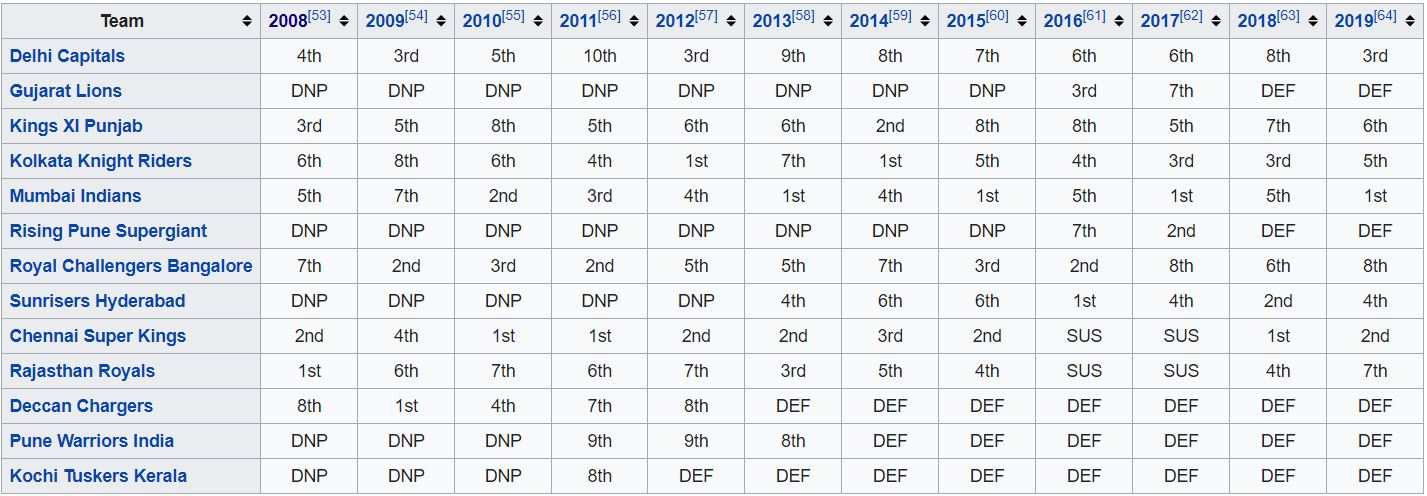 

In [31]:
for i in matches.index:
    
    if matches['season'][i]==2008:
        if matches['team1'][i]=='Delhi':
            matches['team1'][i]=8
        if matches['team1'][i]=='Punjab':
            matches['team1'][i]=8.5
        if matches['team1'][i]=='Kolkata':
            matches['team1'][i]=7
        if matches['team1'][i]=='Mumbai':
            matches['team1'][i]=7.5
        if matches['team1'][i]=='Bangalore':
            matches['team1'][i]=6.5
        if matches['team1'][i]=='Hyderabad':
            matches['team1'][i]=6
        if matches['team1'][i]=='Chennai':
            matches['team1'][i]=9
        if matches['team1'][i]=='Rajasthan':
            matches['team1'][i]=9.5
            
    if matches['season'][i]==2009:
        if matches['team1'][i]=='Delhi':
            matches['team1'][i]=8.5
        if matches['team1'][i]=='Punjab':
            matches['team1'][i]=7.5
        if matches['team1'][i]=='Kolkata':
            matches['team1'][i]=6
        if matches['team1'][i]=='Mumbai':
            matches['team1'][i]=6.5
        if matches['team1'][i]=='Bangalore':
            matches['team1'][i]=9
        if matches['team1'][i]=='Hyderabad':
            matches['team1'][i]=9.5
        if matches['team1'][i]=='Chennai':
            matches['team1'][i]=8
        if matches['team1'][i]=='Rajasthan':
            matches['team1'][i]=7
    
    if matches['season'][i]==2010:
        if matches['team1'][i]=='Delhi':
            matches['team1'][i]=7.5
        if matches['team1'][i]=='Punjab':
            matches['team1'][i]=6
        if matches['team1'][i]=='Kolkata':
            matches['team1'][i]=7
        if matches['team1'][i]=='Mumbai':
            matches['team1'][i]=9
        if matches['team1'][i]=='Bangalore':
            matches['team1'][i]=8.5
        if matches['team1'][i]=='Hyderabad':
            matches['team1'][i]=8
        if matches['team1'][i]=='Chennai':
            matches['team1'][i]=9.5
        if matches['team1'][i]=='Rajasthan':
            matches['team1'][i]=6.5
            
    if matches['season'][i]==2011:
        if matches['team1'][i]=='Delhi':
            matches['team1'][i]=5
        if matches['team1'][i]=='Punjab':
            matches['team1'][i]=7.5
        if matches['team1'][i]=='Kolkata':
            matches['team1'][i]=8
        if matches['team1'][i]=='Mumbai':
            matches['team1'][i]=8.5
        if matches['team1'][i]=='Bangalore':
            matches['team1'][i]=9
        if matches['team1'][i]=='Hyderabad':
            matches['team1'][i]=6.5
        if matches['team1'][i]=='Chennai':
            matches['team1'][i]=9.5
        if matches['team1'][i]=='Rajasthan':
            matches['team1'][i]=7
        if matches['team1'][i]=='Kochi':
            matches['team1'][i]=6
        if matches['team1'][i]=='Pune':
            matches['team1'][i]=5.5
            
    if matches['season'][i]==2012:
        if matches['team1'][i]=='Delhi':
            matches['team1'][i]=8.5
        if matches['team1'][i]=='Punjab':
            matches['team1'][i]=7
        if matches['team1'][i]=='Kolkata':
            matches['team1'][i]=9.5
        if matches['team1'][i]=='Mumbai':
            matches['team1'][i]=8
        if matches['team1'][i]=='Bangalore':
            matches['team1'][i]=7.5
        if matches['team1'][i]=='Hyderabad':
            matches['team1'][i]=6
        if matches['team1'][i]=='Chennai':
            matches['team1'][i]=9
        if matches['team1'][i]=='Rajasthan':
            matches['team1'][i]=6.5
        if matches['team1'][i]=='Pune':
            matches['team1'][i]=5.5
            
            
    if matches['season'][i]==2013:
        if matches['team1'][i]=='Delhi':
            matches['team1'][i]=5.5
        if matches['team1'][i]=='Punjab':
            matches['team1'][i]=7
        if matches['team1'][i]=='Kolkata':
            matches['team1'][i]=6.5
        if matches['team1'][i]=='Mumbai':
            matches['team1'][i]=9.5
        if matches['team1'][i]=='Bangalore':
            matches['team1'][i]=7.5
        if matches['team1'][i]=='Hyderabad':
            matches['team1'][i]=8
        if matches['team1'][i]=='Chennai':
            matches['team1'][i]=9
        if matches['team1'][i]=='Rajasthan':
            matches['team1'][i]=8.5
        if matches['team1'][i]=='Pune':
            matches['team1'][i]=6
            
        
            
    if matches['season'][i]==2014:
        if matches['team1'][i]=='Delhi':
            matches['team1'][i]=6
        if matches['team1'][i]=='Punjab':
            matches['team1'][i]=9
        if matches['team1'][i]=='Kolkata':
            matches['team1'][i]=9.5
        if matches['team1'][i]=='Mumbai':
            matches['team1'][i]=8
        if matches['team1'][i]=='Bangalore':
            matches['team1'][i]=6.5
        if matches['team1'][i]=='Hyderabad':
            matches['team1'][i]=7
        if matches['team1'][i]=='Chennai':
            matches['team1'][i]=8.5
        if matches['team1'][i]=='Rajasthan':
            matches['team1'][i]=7.5
            
    
            
    if matches['season'][i]==2015:
        if matches['team1'][i]=='Delhi':
            matches['team1'][i]=6.5
        if matches['team1'][i]=='Punjab':
            matches['team1'][i]=6
        if matches['team1'][i]=='Kolkata':
            matches['team1'][i]=7.5
        if matches['team1'][i]=='Mumbai':
            matches['team1'][i]=9.5
        if matches['team1'][i]=='Bangalore':
            matches['team1'][i]=8.5
        if matches['team1'][i]=='Hyderabad':
            matches['team1'][i]=7
        if matches['team1'][i]=='Chennai':
            matches['team1'][i]=9
        if matches['team1'][i]=='Rajasthan':
            matches['team1'][i]=8
            
    if matches['season'][i]==2016:
        if matches['team1'][i]=='Delhi':
            matches['team1'][i]=7
        if matches['team1'][i]=='Punjab':
            matches['team1'][i]=6
        if matches['team1'][i]=='Kolkata':
            matches['team1'][i]=8
        if matches['team1'][i]=='Mumbai':
            matches['team1'][i]=7.5
        if matches['team1'][i]=='Bangalore':
            matches['team1'][i]=9
        if matches['team1'][i]=='Hyderabad':
            matches['team1'][i]=9.5
        if matches['team1'][i]=='Gujarat':
            matches['team1'][i]=8.5
        if matches['team1'][i]=='Pune':
            matches['team1'][i]=6.5
            
    if matches['season'][i]==2017:
        if matches['team1'][i]=='Delhi':
            matches['team1'][i]=7
        if matches['team1'][i]=='Punjab':
            matches['team1'][i]=7.5
        if matches['team1'][i]=='Kolkata':
            matches['team1'][i]=8.5
        if matches['team1'][i]=='Mumbai':
            matches['team1'][i]=9.5
        if matches['team1'][i]=='Bangalore':
            matches['team1'][i]=6
        if matches['team1'][i]=='Hyderabad':
            matches['team1'][i]=8
        if matches['team1'][i]=='Gujarat':
            matches['team1'][i]=6.5
        if matches['team1'][i]=='Pune':
            matches['team1'][i]=9
            
    if matches['season'][i]==2018:
        if matches['team1'][i]=='Delhi':
            matches['team1'][i]=6
        if matches['team1'][i]=='Punjab':
            matches['team1'][i]=6.5
        if matches['team1'][i]=='Kolkata':
            matches['team1'][i]=8.5
        if matches['team1'][i]=='Mumbai':
            matches['team1'][i]=7.5
        if matches['team1'][i]=='Bangalore':
            matches['team1'][i]=7
        if matches['team1'][i]=='Hyderabad':
            matches['team1'][i]=9.0
        if matches['team1'][i]=='Chennai':
            matches['team1'][i]=9.5
        if matches['team1'][i]=='Rajasthan':
            matches['team1'][i]=8
            
    if matches['season'][i]==2019:
        if matches['team1'][i]=='Delhi':
            matches['team1'][i]=8.5
        if matches['team1'][i]=='Punjab':
            matches['team1'][i]=7
        if matches['team1'][i]=='Kolkata':
            matches['team1'][i]=7.5
        if matches['team1'][i]=='Mumbai':
            matches['team1'][i]=9.5
        if matches['team1'][i]=='Bangalore':
            matches['team1'][i]=6
        if matches['team1'][i]=='Hyderabad':
            matches['team1'][i]=8
        if matches['team1'][i]=='Chennai':
            matches['team1'][i]=9
        if matches['team1'][i]=='Rajasthan':
            matches['team1'][i]=6.5

In [32]:
for i in matches.index:
    
    if matches['season'][i]==2008:
        if matches['team2'][i]=='Delhi':
            matches['team2'][i]=8
        if matches['team2'][i]=='Punjab':
            matches['team2'][i]=8.5
        if matches['team2'][i]=='Kolkata':
            matches['team2'][i]=7
        if matches['team2'][i]=='Mumbai':
            matches['team2'][i]=7.5
        if matches['team2'][i]=='Bangalore':
            matches['team2'][i]=6.5
        if matches['team2'][i]=='Hyderabad':
            matches['team2'][i]=6
        if matches['team2'][i]=='Chennai':
            matches['team2'][i]=9
        if matches['team2'][i]=='Rajasthan':
            matches['team2'][i]=9.5
            
    if matches['season'][i]==2009:
        if matches['team2'][i]=='Delhi':
            matches['team2'][i]=8.5
        if matches['team2'][i]=='Punjab':
            matches['team2'][i]=7.5
        if matches['team2'][i]=='Kolkata':
            matches['team2'][i]=6
        if matches['team2'][i]=='Mumbai':
            matches['team2'][i]=6.5
        if matches['team2'][i]=='Bangalore':
            matches['team2'][i]=9
        if matches['team2'][i]=='Hyderabad':
            matches['team2'][i]=9.5
        if matches['team2'][i]=='Chennai':
            matches['team2'][i]=8
        if matches['team2'][i]=='Rajasthan':
            matches['team2'][i]=7
    
    if matches['season'][i]==2010:
        if matches['team2'][i]=='Delhi':
            matches['team2'][i]=7.5
        if matches['team2'][i]=='Punjab':
            matches['team2'][i]=6
        if matches['team2'][i]=='Kolkata':
            matches['team2'][i]=7
        if matches['team2'][i]=='Mumbai':
            matches['team2'][i]=9
        if matches['team2'][i]=='Bangalore':
            matches['team2'][i]=8.5
        if matches['team2'][i]=='Hyderabad':
            matches['team2'][i]=8
        if matches['team2'][i]=='Chennai':
            matches['team2'][i]=9.5
        if matches['team2'][i]=='Rajasthan':
            matches['team2'][i]=6.5
            
    if matches['season'][i]==2011:
        if matches['team2'][i]=='Delhi':
            matches['team2'][i]=5
        if matches['team2'][i]=='Punjab':
            matches['team2'][i]=7.5
        if matches['team2'][i]=='Kolkata':
            matches['team2'][i]=8
        if matches['team2'][i]=='Mumbai':
            matches['team2'][i]=8.5
        if matches['team2'][i]=='Bangalore':
            matches['team2'][i]=9
        if matches['team2'][i]=='Hyderabad':
            matches['team2'][i]=6.5
        if matches['team2'][i]=='Chennai':
            matches['team2'][i]=9.5
        if matches['team2'][i]=='Rajasthan':
            matches['team2'][i]=7
        if matches['team2'][i]=='Kochi':
            matches['team2'][i]=6
        if matches['team2'][i]=='Pune':
            matches['team2'][i]=5.5
            
    if matches['season'][i]==2012:
        if matches['team2'][i]=='Delhi':
            matches['team2'][i]=8.5
        if matches['team2'][i]=='Punjab':
            matches['team2'][i]=7
        if matches['team2'][i]=='Kolkata':
            matches['team2'][i]=9.5
        if matches['team2'][i]=='Mumbai':
            matches['team2'][i]=8
        if matches['team2'][i]=='Bangalore':
            matches['team2'][i]=7.5
        if matches['team2'][i]=='Hyderabad':
            matches['team2'][i]=6
        if matches['team2'][i]=='Chennai':
            matches['team2'][i]=9
        if matches['team2'][i]=='Rajasthan':
            matches['team2'][i]=6.5
        if matches['team2'][i]=='Pune':
            matches['team2'][i]=5.5
            
            
    if matches['season'][i]==2013:
        if matches['team2'][i]=='Delhi':
            matches['team2'][i]=5.5
        if matches['team2'][i]=='Punjab':
            matches['team2'][i]=7
        if matches['team2'][i]=='Kolkata':
            matches['team2'][i]=6.5
        if matches['team2'][i]=='Mumbai':
            matches['team2'][i]=9.5
        if matches['team2'][i]=='Bangalore':
            matches['team2'][i]=7.5
        if matches['team2'][i]=='Hyderabad':
            matches['team2'][i]=8
        if matches['team2'][i]=='Chennai':
            matches['team2'][i]=9
        if matches['team2'][i]=='Rajasthan':
            matches['team2'][i]=8.5
        if matches['team2'][i]=='Pune':
            matches['team2'][i]=6
            
        
            
    if matches['season'][i]==2014:
        if matches['team2'][i]=='Delhi':
            matches['team2'][i]=6
        if matches['team2'][i]=='Punjab':
            matches['team2'][i]=9
        if matches['team2'][i]=='Kolkata':
            matches['team2'][i]=9.5
        if matches['team2'][i]=='Mumbai':
            matches['team2'][i]=8
        if matches['team2'][i]=='Bangalore':
            matches['team2'][i]=6.5
        if matches['team2'][i]=='Hyderabad':
            matches['team2'][i]=7
        if matches['team2'][i]=='Chennai':
            matches['team2'][i]=8.5
        if matches['team2'][i]=='Rajasthan':
            matches['team2'][i]=7.5
            
    
            
    if matches['season'][i]==2015:
        if matches['team2'][i]=='Delhi':
            matches['team2'][i]=6.5
        if matches['team2'][i]=='Punjab':
            matches['team2'][i]=6
        if matches['team2'][i]=='Kolkata':
            matches['team2'][i]=7.5
        if matches['team2'][i]=='Mumbai':
            matches['team2'][i]=9.5
        if matches['team2'][i]=='Bangalore':
            matches['team2'][i]=8.5
        if matches['team2'][i]=='Hyderabad':
            matches['team2'][i]=7
        if matches['team2'][i]=='Chennai':
            matches['team2'][i]=9
        if matches['team2'][i]=='Rajasthan':
            matches['team2'][i]=8
            
    if matches['season'][i]==2016:
        if matches['team2'][i]=='Delhi':
            matches['team2'][i]=7
        if matches['team2'][i]=='Punjab':
            matches['team2'][i]=6
        if matches['team2'][i]=='Kolkata':
            matches['team2'][i]=8
        if matches['team2'][i]=='Mumbai':
            matches['team2'][i]=7.5
        if matches['team2'][i]=='Bangalore':
            matches['team2'][i]=9
        if matches['team2'][i]=='Hyderabad':
            matches['team2'][i]=9.5
        if matches['team2'][i]=='Gujarat':
            matches['team2'][i]=8.5
        if matches['team2'][i]=='Pune':
            matches['team2'][i]=6.5
            
    if matches['season'][i]==2017:
        if matches['team2'][i]=='Delhi':
            matches['team2'][i]=7
        if matches['team2'][i]=='Punjab':
            matches['team2'][i]=7.5
        if matches['team2'][i]=='Kolkata':
            matches['team2'][i]=8.5
        if matches['team2'][i]=='Mumbai':
            matches['team2'][i]=9.5
        if matches['team2'][i]=='Bangalore':
            matches['team2'][i]=6
        if matches['team2'][i]=='Hyderabad':
            matches['team2'][i]=8
        if matches['team2'][i]=='Gujarat':
            matches['team2'][i]=6.5
        if matches['team2'][i]=='Pune':
            matches['team2'][i]=9
            
    if matches['season'][i]==2018:
        if matches['team2'][i]=='Delhi':
            matches['team2'][i]=6
        if matches['team2'][i]=='Punjab':
            matches['team2'][i]=6.5
        if matches['team2'][i]=='Kolkata':
            matches['team2'][i]=8.5
        if matches['team2'][i]=='Mumbai':
            matches['team2'][i]=7.5
        if matches['team2'][i]=='Bangalore':
            matches['team2'][i]=7
        if matches['team2'][i]=='Hyderabad':
            matches['team2'][i]=9.0
        if matches['team2'][i]=='Chennai':
            matches['team2'][i]=9.5
        if matches['team2'][i]=='Rajasthan':
            matches['team2'][i]=8
            
    if matches['season'][i]==2019:
        if matches['team2'][i]=='Delhi':
            matches['team2'][i]=8.5
        if matches['team2'][i]=='Punjab':
            matches['team2'][i]=7
        if matches['team2'][i]=='Kolkata':
            matches['team2'][i]=7.5
        if matches['team2'][i]=='Mumbai':
            matches['team2'][i]=9.5
        if matches['team2'][i]=='Bangalore':
            matches['team2'][i]=6
        if matches['team2'][i]=='Hyderabad':
            matches['team2'][i]=8
        if matches['team2'][i]=='Chennai':
            matches['team2'][i]=9
        if matches['team2'][i]=='Rajasthan':
            matches['team2'][i]=6.5

In [33]:
matches.head(-20)

,season,team1,team2,Homeground,toss_winner,winner
0,2017,8,6,1.0,0.0,1
1,2017,9.5,9,0.0,0.0,0
2,2017,6.5,8.5,1.0,0.0,0
3,2017,9,7.5,0.5,0.0,0
4,2017,6,7,1.0,1.0,1
...,...,...,...,...,...,...
731,2019,9.5,6.5,0.0,0.0,0
732,2019,7,8.5,0.0,0.0,0
733,2019,7.5,8,0.0,0.0,0
734,2019,6,9,0.5,0.0,1


In [34]:
matches.dtypes

season           int64
team1           object
team2           object
Homeground     float64
toss_winner    float64
winner           int64
dtype: object

In [35]:
matches['team1']=matches['team1'].astype(str).astype(float)

In [36]:
matches['team2']=matches['team2'].astype(str).astype(float)

In [37]:
matches.dtypes

season           int64
team1          float64
team2          float64
Homeground     float64
toss_winner    float64
winner           int64
dtype: object

In [38]:
matches.head()

,season,team1,team2,Homeground,toss_winner,winner
0,2017,8.0,6.0,1.0,0.0,1
1,2017,9.5,9.0,0.0,0.0,0
2,2017,6.5,8.5,1.0,0.0,0
3,2017,9.0,7.5,0.5,0.0,0
4,2017,6.0,7.0,1.0,1.0,1


In [39]:
X=matches.iloc[:,1:5].values

In [40]:
X

array([[8. , 6. , 1. , 0. ],
       [9.5, 9. , 0. , 0. ],
       [6.5, 8.5, 1. , 0. ],
       ...,
       [8. , 8.5, 1. , 0. ],
       [8.5, 9. , 0.5, 0. ],
       [9.5, 9. , 0.5, 1. ]])

In [41]:
Y=matches.iloc[:,5].values

In [42]:
Y

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,

In [43]:
from sklearn.model_selection import train_test_split

In [176]:
xTrain, xTest, yTrain, yTest = train_test_split(X,Y, test_size = 0.1, random_state = 0)
yTest

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [177]:
from sklearn.linear_model import LogisticRegression

In [178]:
Model=LogisticRegression(random_state = 0,solver='lbfgs')

In [179]:
Model.fit(xTrain,yTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [180]:
Model.predict(xTest)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [181]:
from sklearn.metrics import accuracy_score

In [182]:
accuracy_score(Model.predict(xTest), yTest)

0.7105263157894737

In [183]:
print(Model.coef_)

[[ 0.43785251 -0.42207145  0.57592031  0.10241496]]
